In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, recall_score,mean_squared_log_error ,confusion_matrix,ConfusionMatrixDisplay, mean_absolute_error, roc_auc_score, roc_curve,mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from matplotlib import rcParams
import scipy.stats as stats
import matplotlib.ticker as ticker
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import warnings
warnings.filterwarnings('ignore')
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler   


### En "Modelo" Seteamos el Algoritmo que queremos utlizar en la plantilla

In [69]:
modelo = HistGradientBoostingClassifier()
#DecisionTreeClassifier()
#xgb.XGBClassifier(colsample_bytree= 0.7509509174274727, gamma= 5.475013919682718, max_depth= 11, min_child_weight= 5, reg_alpha= 174, reg_lambda= 0.15862621762542617)
#AdaBoostClassifier(DecisionTreeClassifier(max_depth=30),algorithm='SAMME', n_estimators=50)
#GaussianNB()
#DecisionTreeClassifier(max_depth=30)
#DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=30,max_features=None, max_leaf_nodes=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0 ,random_state=None,splitter='best')
#DecisionTreeClassifier(max_depth=34, min_samples_split=10, min_samples_leaf=10, max_features='auto', criterion='entropy',splitter='best')
#RandomForestClassifier(n_estimators= 6, min_samples_split= 10, min_samples_leaf= 3, max_features= 'sqrt', max_depth= 10, bootstrap= False)
#DecisionTreeClassifier(criterion= 'gini', max_depth= None, max_features= 3, min_samples_leaf= 1)
#RandomForestClassifier(n_estimators=200, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 10)
# #AdaBoostClassifier(DecisionTreeClassifier(max_depth=7),algorithm='SAMME', n_estimators=200)
# #GaussianNB(),
# #xgb.XGBClassifier(objective="binary:logistic", random_state=42),
# #BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 8), bootstrap_features=False, n_estimators= 200, n_jobs = -1) , 
# LogisticRegression()
KNeighborsClassifier

In [70]:
#IMPORTAMOS EL DATASET Y OBSERVAMOS CON UN HEAD LA 1RA FILA
df = pd.read_excel('Datathon/E-Commerce_train.xlsx')
df.head(1)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1


In [71]:
#USAMOS LA FUNCION INFO PARA VER LOS TIPOS DE DATOS Y LA CANTIDAD DE DATOS POR COLUMNA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [72]:
# VEMOS LA CANTIDAD DE DATOS NULOS POR COLUMNA. EN ESTE CASO NO TENEMOS NINGUNO.
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [73]:
# VEMOS LA CANTIDAD DE FILAS DUPLICADAS. EN ESTE CASO NO TENEMOS NINGUNO.
df.duplicated().sum()

0

In [74]:
#GRAFICAMOS BOXPLOTS DE LAS COLUMNAS NUMERICAS PARA OBSERVAR LA PRESENCIA O NO DE OUTLIERS.
#MOSTRANDO LA EXISTENCIA DE OUTLIERS EN LAS COLUMNAS 'Prior_purchases' Y 'Discount_offered'

rcParams['figure.figsize'] = 14, 5
rcParams['lines.linewidth'] = 4
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'


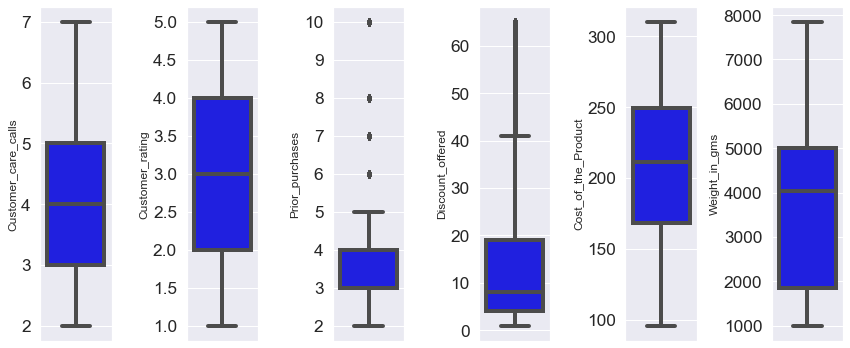

In [75]:

col_num = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']
features = col_num
for i in range(0, len(features)-1):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

In [76]:
col_num = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']

df_Limpieza = df.copy()
print(f'Tamaño muestra: {len(df_Limpieza)}')

filtro1 = np.array([True] * len(df_Limpieza))

for col in col_num:
    zscore = abs(stats.zscore(df_Limpieza[col])) 
    filtro1 = (zscore < 3) & filtro1  #PONEMOS UN FILTRO DE ZSCORE >= 3
    
df_SinOutliers = df_Limpieza[filtro1] 

print(f'Total Outliers: {len(df_Limpieza)-len(df_SinOutliers)}')
print(f'Muestra sin Outliers: {len(df_SinOutliers)}')

Tamaño muestra: 8999
Total Outliers: 152
Muestra sin Outliers: 8847


In [77]:
df_SinOutliers.head(1)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1


In [78]:
df_SinOutliers=df_SinOutliers.drop(['ID'], axis = 1) 

In [79]:
df_cat = df_SinOutliers.select_dtypes(include=['object'])
df_nums = df_SinOutliers.select_dtypes(include=['int64','float64'])

In [80]:
def plot_corre_heatmap(corr):
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t) 
    plt.show()

MATRIZ DE CORRELACION - METODO : PEARSON


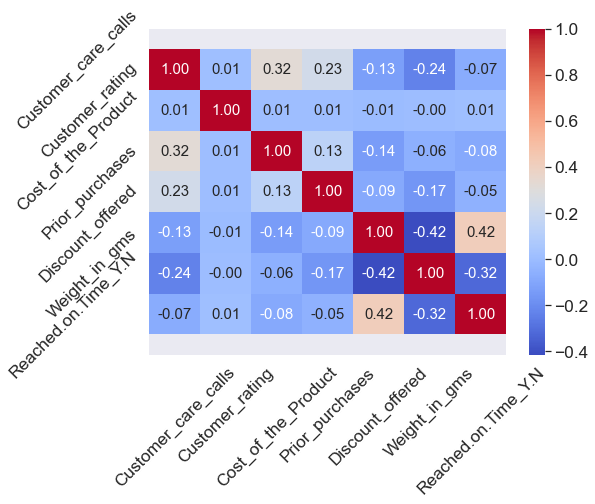

MATRIZ DE CORRELACION - METODO : KENDALL


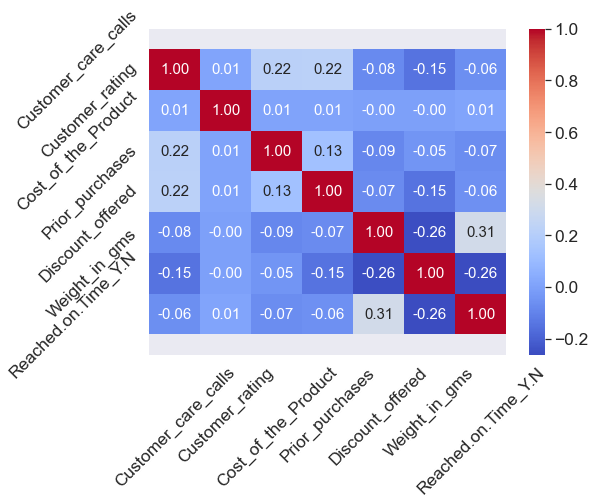

MATRIZ DE CORRELACION - METODO : SPEARMAN


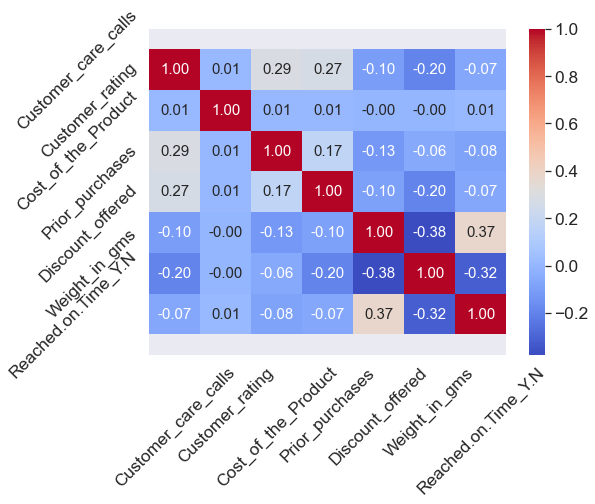

In [81]:
# ARMAMOS  3 MATRICES DE CORRELACION DE LAS VARIABLES NUMERICAS, USANDO EL METODO PEARSON PARA BUSCAR CORRELACION LINEAL Y LOS METODOS DE KENDAL Y SPEARMAN PARA ANALIZAR LA POSIBLE EXISTENCIA DE CORRELACION NO LINEAL

corr = df_nums.corr()
corr2 = df_nums.corr(method='kendall')
corr3 = df_nums.corr(method='spearman')
print('MATRIZ DE CORRELACION - METODO : PEARSON')
print('MATRIZ DE CORRELACION - METODO : PEARSON')
plot_corre_heatmap(corr)
print('MATRIZ DE CORRELACION - METODO : KENDALL')
plot_corre_heatmap(corr2)
print('MATRIZ DE CORRELACION - METODO : SPEARMAN')
plot_corre_heatmap(corr3)

Text(0.5, 0.98, 'Distribución variables Categorica')

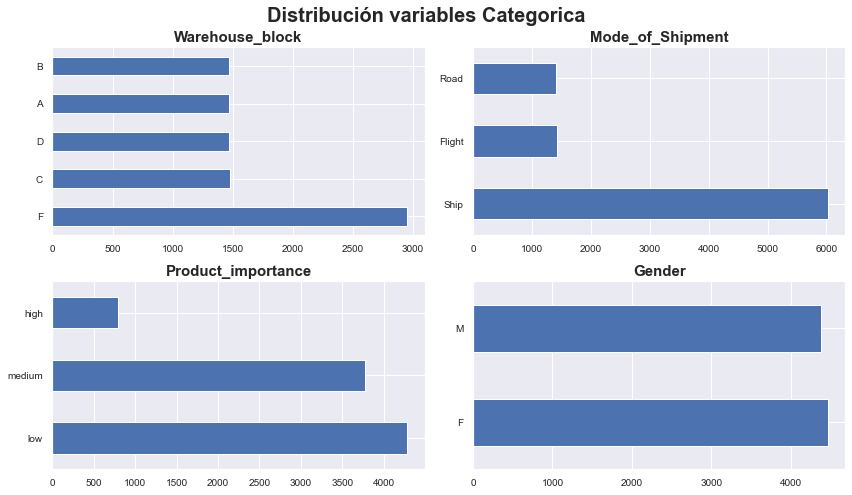

In [82]:
# Gráfico para cada variable Categorica

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
axes = axes.flat
columnas_object = df_cat.columns

for i, colum in enumerate(columnas_object):
    df_cat[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables Categorica',
             fontsize = 20, fontweight = "bold")

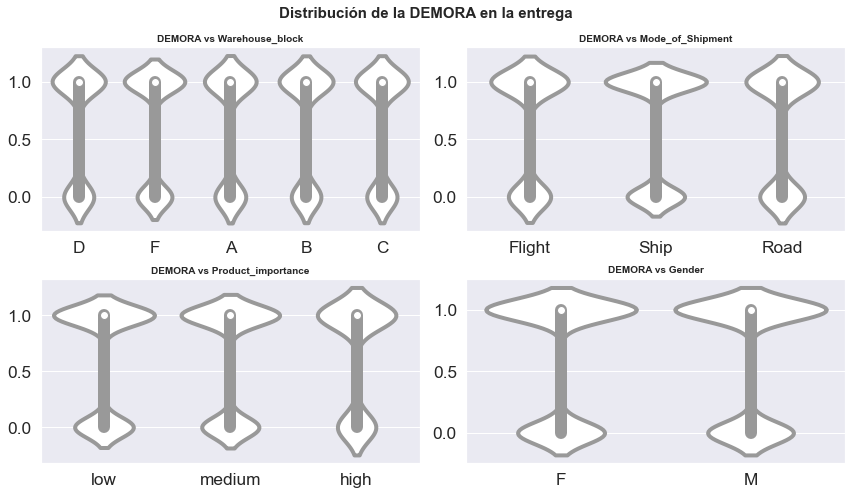

In [83]:
# Gráfico relación entre la Demora y cada cada variables cualitativas

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
axes = axes.flat
columnas_object = df_cat.columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = df_nums['Reached.on.Time_Y.N'],
        data  = df_cat,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"DEMORA vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de la DEMORA en la entrega', fontsize = 15, fontweight = "bold");

In [84]:
# Transformamos las Variables categoricas a Numericas
df_cat2=df_cat.copy()

for col in df_cat2.columns:
  if(df_cat2[col].dtype == 'object'):
      le=LabelEncoder()
      df_cat2[col]=le.fit_transform(df_cat2[col])

In [85]:
# Se concatenan las variables Numericas y Categoricas transformadas
df_unido = pd.concat([df_nums, df_cat2], axis=1)

In [86]:
#Creamos Las variables que van como FEATURES para el Modelo y El TARGET
# En este caso use 2 opciones, la primera donde tome todas las variables para usar como features y la segunda donde tome las 5 variables mas correlacionadas
# con el TARGET.

#df_features = df_unido[['Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating','Cost_of_the_Product',
# 'Prior_purchases','Product_importance','Gender','Discount_offered','Weight_in_gms']]

df_features = df_unido[['Customer_care_calls','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']]


df_target = df_unido['Reached.on.Time_Y.N']

X = df_features
y = df_target

In [88]:
#Reseteo de indice
df_unido.reset_index(drop=True, inplace=True)

In [89]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

### LUEGO DE UTILIZAR VARIOS ALGORITMOS, PROBE DE CALIBRAR LAS ESTIMACIONES CON "CalibratedClassifierCV" PERO NO ME DIO BUENOS RESULTADOS, ASI QUE LO DEJE DE LADO.


In [90]:

#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=10 ) 
#X_train, X_train2, y_train, y_train2 = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=10 )

#clf = modelo
#clf.fit(X_train, y_train)
#calibrated_clf = CalibratedClassifierCV(clf, cv="prefit", method="sigmoid")
#calibrated_clf.fit(X_train2, y_train2)
#y_train_pred = clf.predict(X_train)
#y_test_pred = clf.predict(X_train2)
#print(metrics.accuracy_score(y_train, y_train_pred))
#print(metrics.accuracy_score(y_train2, y_test_pred))

### ESCALAMOS LAS VARIABLES POR SEPARADO (TRAIN Y TEST) USANDO "StandardScaler", TAMBIEN PROBE CON ROBUST SCALER, PERO NO Me dio buenos resultados.

In [91]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
# AhoraSE FITEA Y PREDICE CON EL ALGORITMO QUE SETEAMOS AL PRINCIPIO DEL NOTEBOOK Y NO DA LAS PRIMERAS METRICAS DE ACURACCY
clf = modelo
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.8349583156704818
0.6949152542372882


## En los siguiente cuandro de CODE, se ingresa el codigo para optimizar los hiperparametros del algoritmo que hayamos seleccionado

### IMPORTAMOS EL DATASET TEST Y OBSERVAMOS CON UN HEAD LA 1RA FILA

In [109]:
df_test = pd.read_excel('Datathon/E-Commerce_test.xlsx')
df_test.head(1)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,9000,F,Ship,5,1,189,2,medium,M,10,5248,NaN


In [110]:
#USAMOS LA FUNCION INFO PARA VER LOS TIPOS DE DATOS Y LA CANTIDAD DE DATOS POR COLUMNA
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2000 non-null   int64  
 1   Warehouse_block      2000 non-null   object 
 2   Mode_of_Shipment     2000 non-null   object 
 3   Customer_care_calls  2000 non-null   int64  
 4   Customer_rating      2000 non-null   int64  
 5   Cost_of_the_Product  2000 non-null   int64  
 6   Prior_purchases      2000 non-null   int64  
 7   Product_importance   2000 non-null   object 
 8   Gender               2000 non-null   object 
 9   Discount_offered     2000 non-null   int64  
 10  Weight_in_gms        2000 non-null   int64  
 11  Reached.on.Time_Y.N  0 non-null      float64
dtypes: float64(1), int64(7), object(4)
memory usage: 187.6+ KB


In [111]:
# VEMOS LA CANTIDAD DE DATOS NULOS POR COLUMNA. EN ESTE CASO NO TENEMOS NINGUNO.
df_test.isna().sum()

ID                        0
Warehouse_block           0
Mode_of_Shipment          0
Customer_care_calls       0
Customer_rating           0
Cost_of_the_Product       0
Prior_purchases           0
Product_importance        0
Gender                    0
Discount_offered          0
Weight_in_gms             0
Reached.on.Time_Y.N    2000
dtype: int64

In [112]:
# VEMOS LA CANTIDAD DE FILAS DUPLICADAS. EN ESTE CASO NO TENEMOS NINGUNO.
df_test.duplicated().sum()

0

In [113]:
df_test=df_test.drop(['ID'], axis = 1) 

In [114]:
# No encontramos Outliers
col_num = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']

df_Limpieza_test = df_test.copy()
print(f'Tamaño muestra: {len(df_Limpieza_test)}')

filtro1 = np.array([True] * len(df_Limpieza_test))

for col in col_num:
    zscore = abs(stats.zscore(df_Limpieza_test[col])) 
    filtro1 = (zscore < 3) & filtro1  #PONEMOS UN FILTRO DE ZSCORE >= 3
    
df_SinOutliers_test = df_Limpieza_test[filtro1] 

print(f'Total Outliers: {len(df_Limpieza_test)-len(df_SinOutliers_test)}')
print(f'Muestra sin Outliers: {len(df_SinOutliers_test)}')

Tamaño muestra: 2000
Total Outliers: 2000
Muestra sin Outliers: 0


In [115]:
# Se separan las columanas del data set en numericas y categoricas
df_cat_test = df_test.select_dtypes(include=['object'])
df_nums_test = df_test.select_dtypes(include=['int64','float64'])

In [116]:
# Transformamos las Variables categoricas a Numericas
df_cat2=df_cat.copy()

df_cat2_test=df_cat_test.copy()

for col in df_cat2_test.columns:
  if(df_cat2_test[col].dtype == 'object'):
      le=LabelEncoder()
      df_cat2_test[col]=le.fit_transform(df_cat2_test[col])

In [117]:
df_unido_test = pd.concat([df_nums_test, df_cat2_test], axis=1)

In [118]:
#Creamos Las variables que van como SOLO como FEATURES para el Modelo
# En este caso use 2 opciones, la primera donde tome todas las variables para usar como features y la segunda donde tome las 5 variables mas correlacionadas
# con el TARGET.

#df_features_test = df_unido_test[['Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Product_importance','Gender','Discount_offered', 'Weight_in_gms']]

df_features_test = df_unido_test[['Customer_care_calls','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']]

X2 = df_features_test

In [119]:
# EScalamos SOLO las Features
scaler = StandardScaler().fit(X2)
X_scaled = scaler.transform(X2)

In [121]:
# # ACA SE FITEA Con las Features escaladas Y PREDICE CON EL ALGORITMO QUE SETEAMOS AL PRINCIPIO DEL NOTEBOOK
clf = modelo
clf.fit(X_train, y_train)
y_test_preds = clf.predict(X_scaled)
y_test_preds

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [122]:
# se transforma el array en un dataset y se nombra la columna como "pred"
file = pd.DataFrame(y_test_preds, columns = ['pred'])

In [123]:
# se guarda el primer csv, sin index
file.to_csv('PabloPoletti11.csv', index = False)

### SACAMOS UN TEST ENTRENANDO TODO EL SET DE ENTRENAMIENTO SIN SPLIT

In [124]:
# volvemos a resetear el indice... ya que me dio problemas varias veces
df_unido.reset_index(drop=True, inplace=True)

In [125]:
#concatenamos los 2 datasets (TRAIN Y TEST)
df_unido_full=pd.concat([df_unido,df_unido_test], axis=0)

In [126]:
#Creamos Las variables que van como FEATURES para el Modelo y El TARGET
# En este caso use 2 opciones, la primera donde tome todas las variables para usar como features y la segunda donde tome las 5 variables mas correlacionadas
# con el TARGET.

#df_features_full = df_unido_full[['Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating', 'Cost_of_the_Product','Prior_purchases','Product_importance','Gender','Discount_offered','Weight_in_gms']]

df_features_full = df_unido_full[['Customer_care_calls','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']]

df_target_full = df_unido_full['Reached.on.Time_Y.N']

Xfull = df_features_full
yfull = df_target_full

### Se realiza un Split, pero asegurandonos que el set para train coincida con las filas que nos quedaron del archivo TRAIN, para lo cual fijamos el tamaño del "Train_size" igual al numero de filas del DF train y le quitamos la aleatoriedad en el corte con shuffle.

### Con esto busque aprovechar una muestra para entrenar de mayor tamaño

In [127]:
X_train, X_test, y_train, y_test = train_test_split(Xfull, yfull, train_size=8847,random_state = 10,shuffle=False)

In [128]:
#ESCALAMOS LAS VARIABLES POR SEPARADO (TRAIN Y TEST) USANDO "StandardScaler"

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [129]:
# AhoraSE FITEA Y PREDICE CON EL ALGORITMO QUE SETEAMOS AL PRINCIPIO DEL NOTEBOOK 
clf = modelo
clf.fit(X_train, y_train)
y_test_preds = clf.predict(X_test)
y_test_preds

array([0., 0., 1., ..., 0., 1., 1.])

In [130]:
# Sacamos las Metricas de Recal y Acuraccy sobre el Train de todo el dataframe
clf = modelo
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.recall_score(y_train, y_train_pred))

0.8245733016841867
0.7815887684378887


In [131]:
# se transforma el array en un dataset y se nombra la columna como "pred"
file = pd.DataFrame(y_test_preds, columns = ['pred'])

In [132]:
# Se guarda el Segundo CSV con las prediciones, tomando toda la muestra TRAIN para entrenar el Modelo
file.to_csv('PabloPoletti22.csv', index = False)

### Como Conclusiones puedo decir que las predicciones realizadas con los diferentes algoritmos dio mejor Accuracy utilizando todo el dataset TRAIN COMPLETO para entrenar y un recall de alrededor de 0.5 en sus mejores predicciones. Pero en el caso de hacer un "Split" en el archivo TRAIN, nos daba mejores "resultados" para la metrica Recall, pero bajando sustancialemente el Acuraccy.

### Decidi no rebalancear usando "Stratify" u otra funcion similar, ya que no me parece que la muesstra este MUY desbalanceada.